In [1]:
import pandas as pd 
import json

In [31]:
new_df

,path,padding_size,area_1,size1_0,size1_1,center1_0,center1_1,degree1,maxcid_1,area_2,size2_0,size2_1,center2_0,center2_1,degree2,maxcid_2,index,front,back,captured_slice_thickness


In [41]:
json_df['index']=json_df['case_id'].str.extract('([0-9]+)').astype(int)

In [37]:
json_df.shape

(210, 3)

In [40]:
json_path=r'C:\Users\higuchi\Desktop\kits19\data\kits.json'
slice_path=r'C:\Users\higuchi\Desktop\LAB\201906_\segmentation\0701max_slice.csv'

json_df=pd.read_json(json_path)
slice_df=pd.read_csv(slice_path,index_col=0,header=0)

In [42]:
new_df=pd.merge(slice_df,json_df.loc[:,['index','captured_slice_thickness']],on='index')

In [43]:
new_df['fixed_area1']=new_df['area_1']*new_df['captured_slice_thickness']
new_df['fixed_area2']=new_df['area_2']*new_df['captured_slice_thickness']

In [65]:
print((new_df['fixed_area1']>10000).sum(),(new_df['fixed_area2']>10000).sum())
print((new_df['fixed_area1']<4000).sum(),(new_df['fixed_area2']<4000).sum())


12 19
1 3


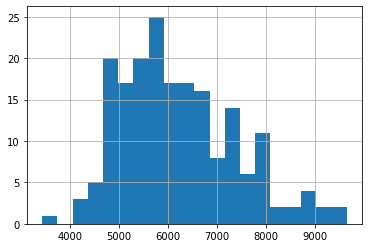

In [73]:
new_df.loc[new_df['fixed_area1']<10000,'fixed_area1'].hist(bins=20)

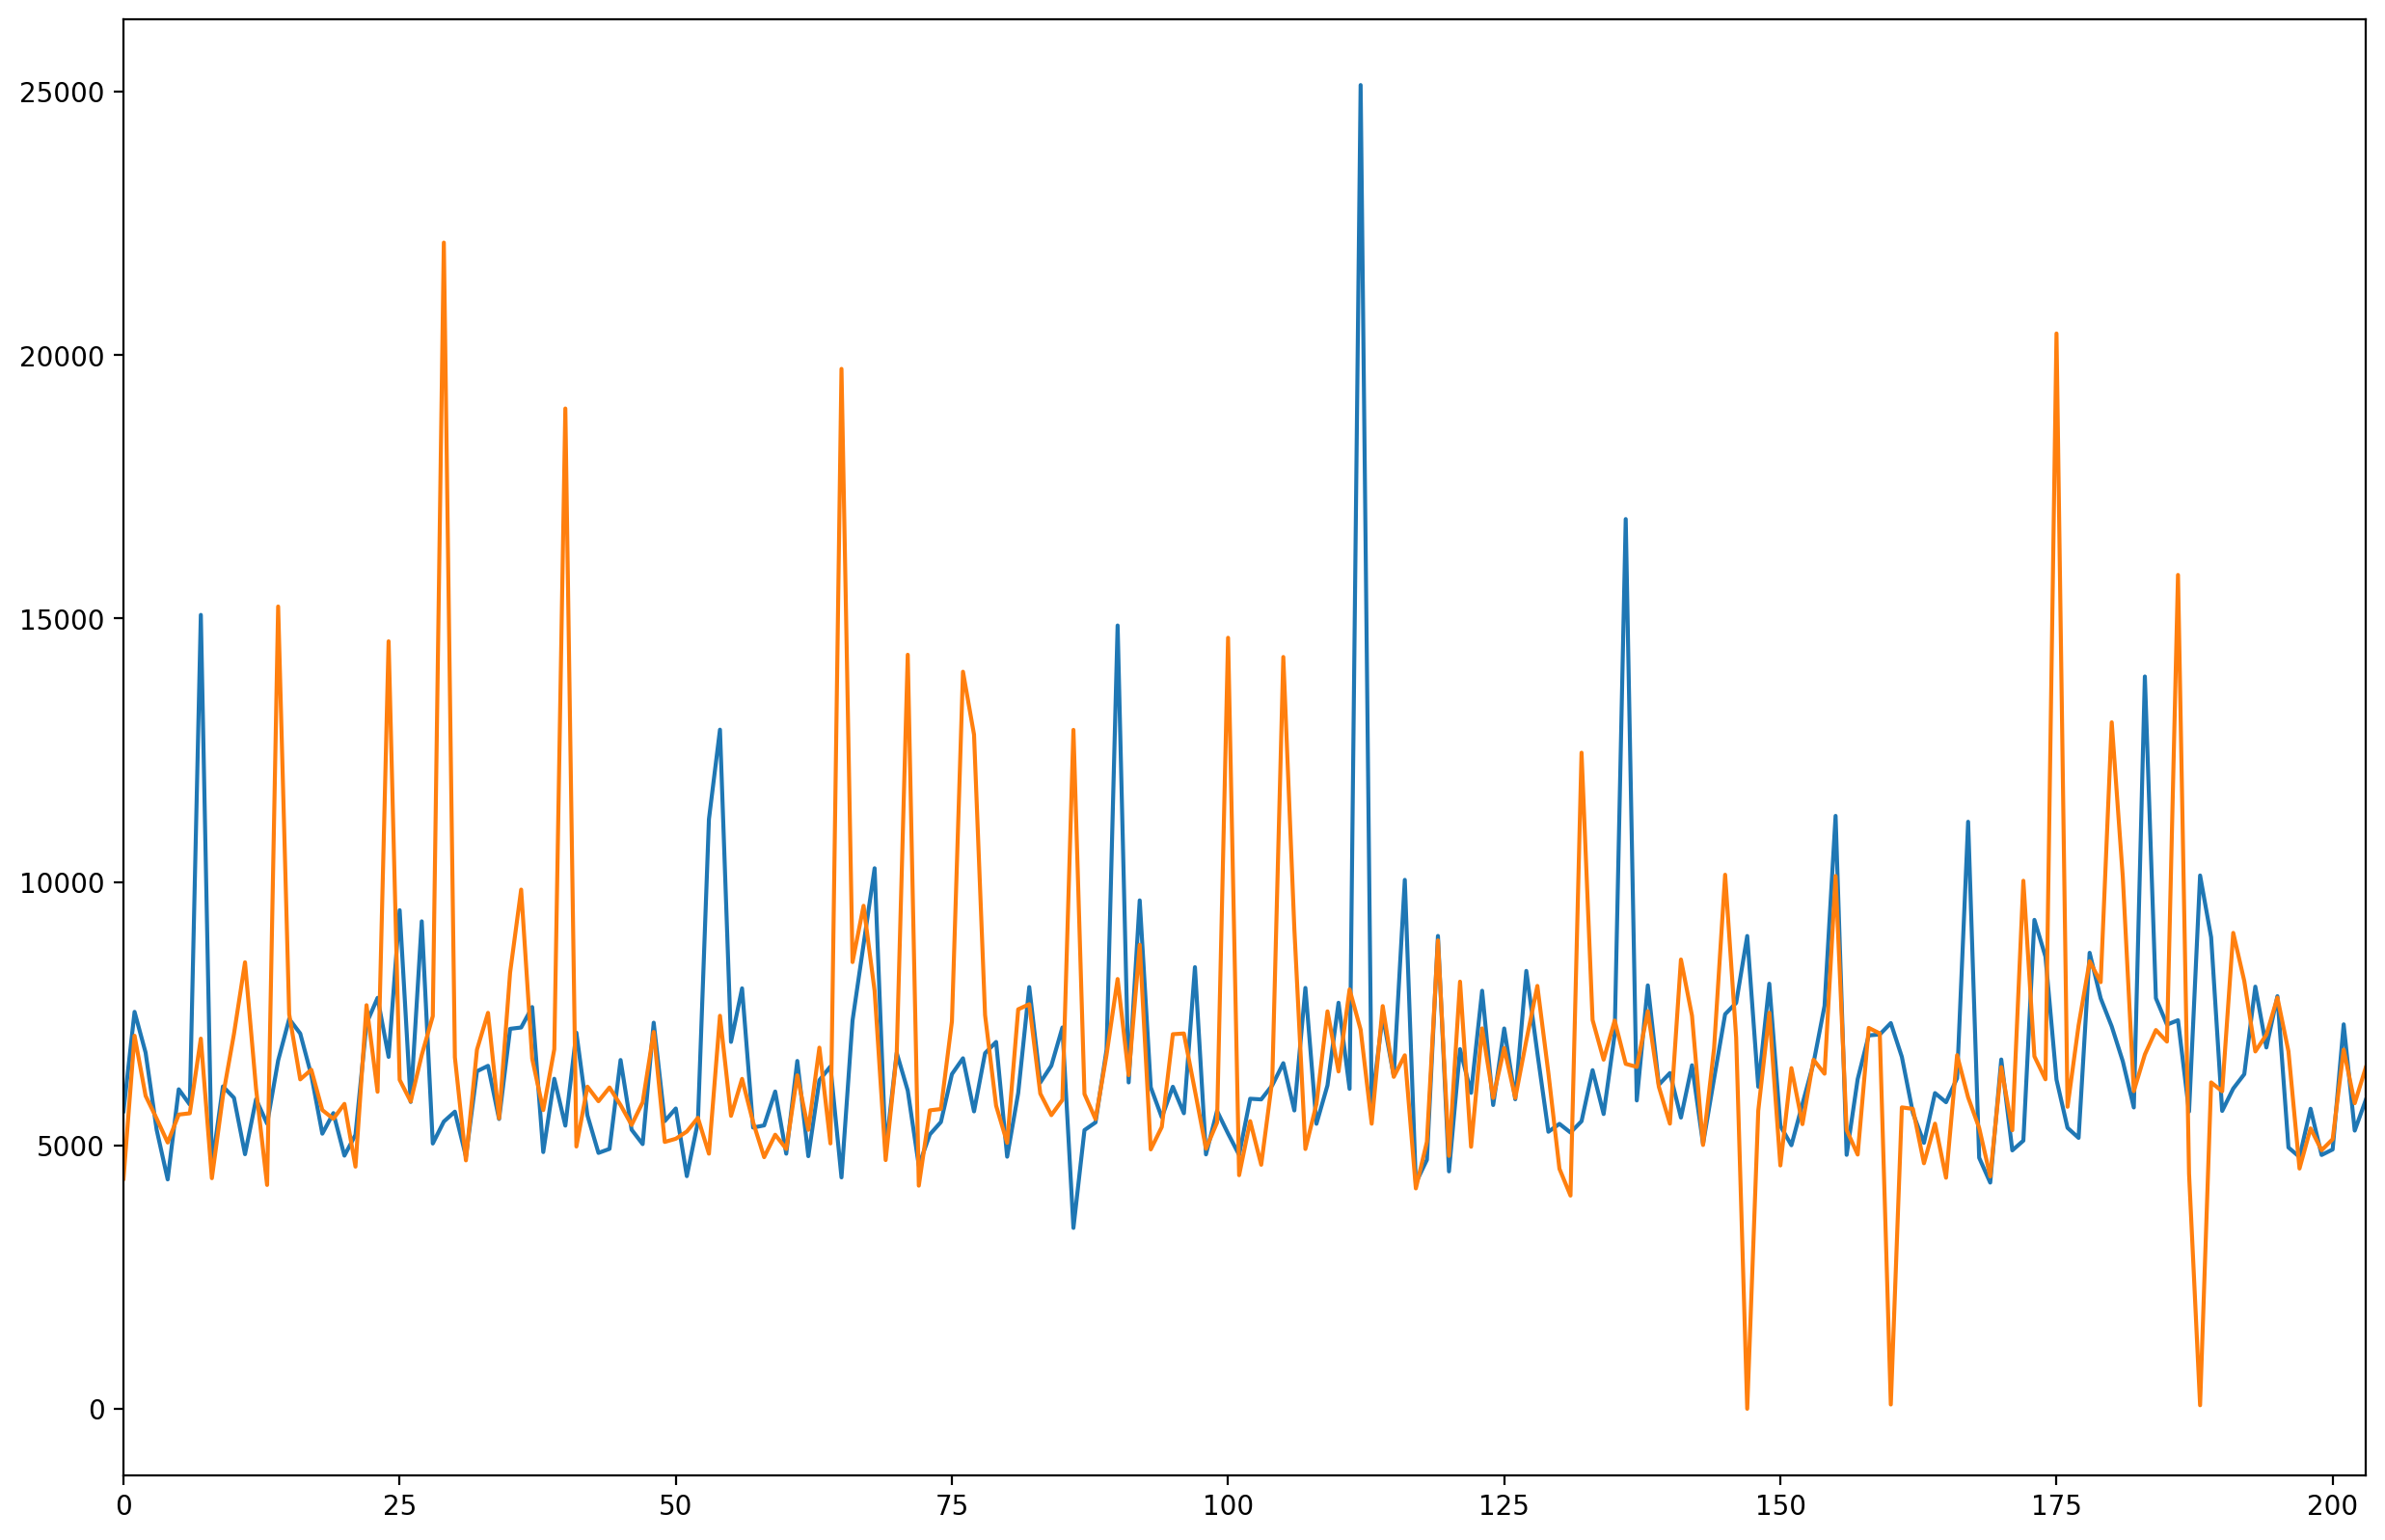

In [51]:
import matplotlib.pyplot as plt
from pylab import rcParams
# rcParams['figure.figsize'] = 18,10

#腎臓とがんの比率
#pltを使うと両方をグラフにできる
figure=plt.figure(figsize=(15,10),dpi=200)
new_df['fixed_area1'].plot()
new_df['fixed_area2'].plot()


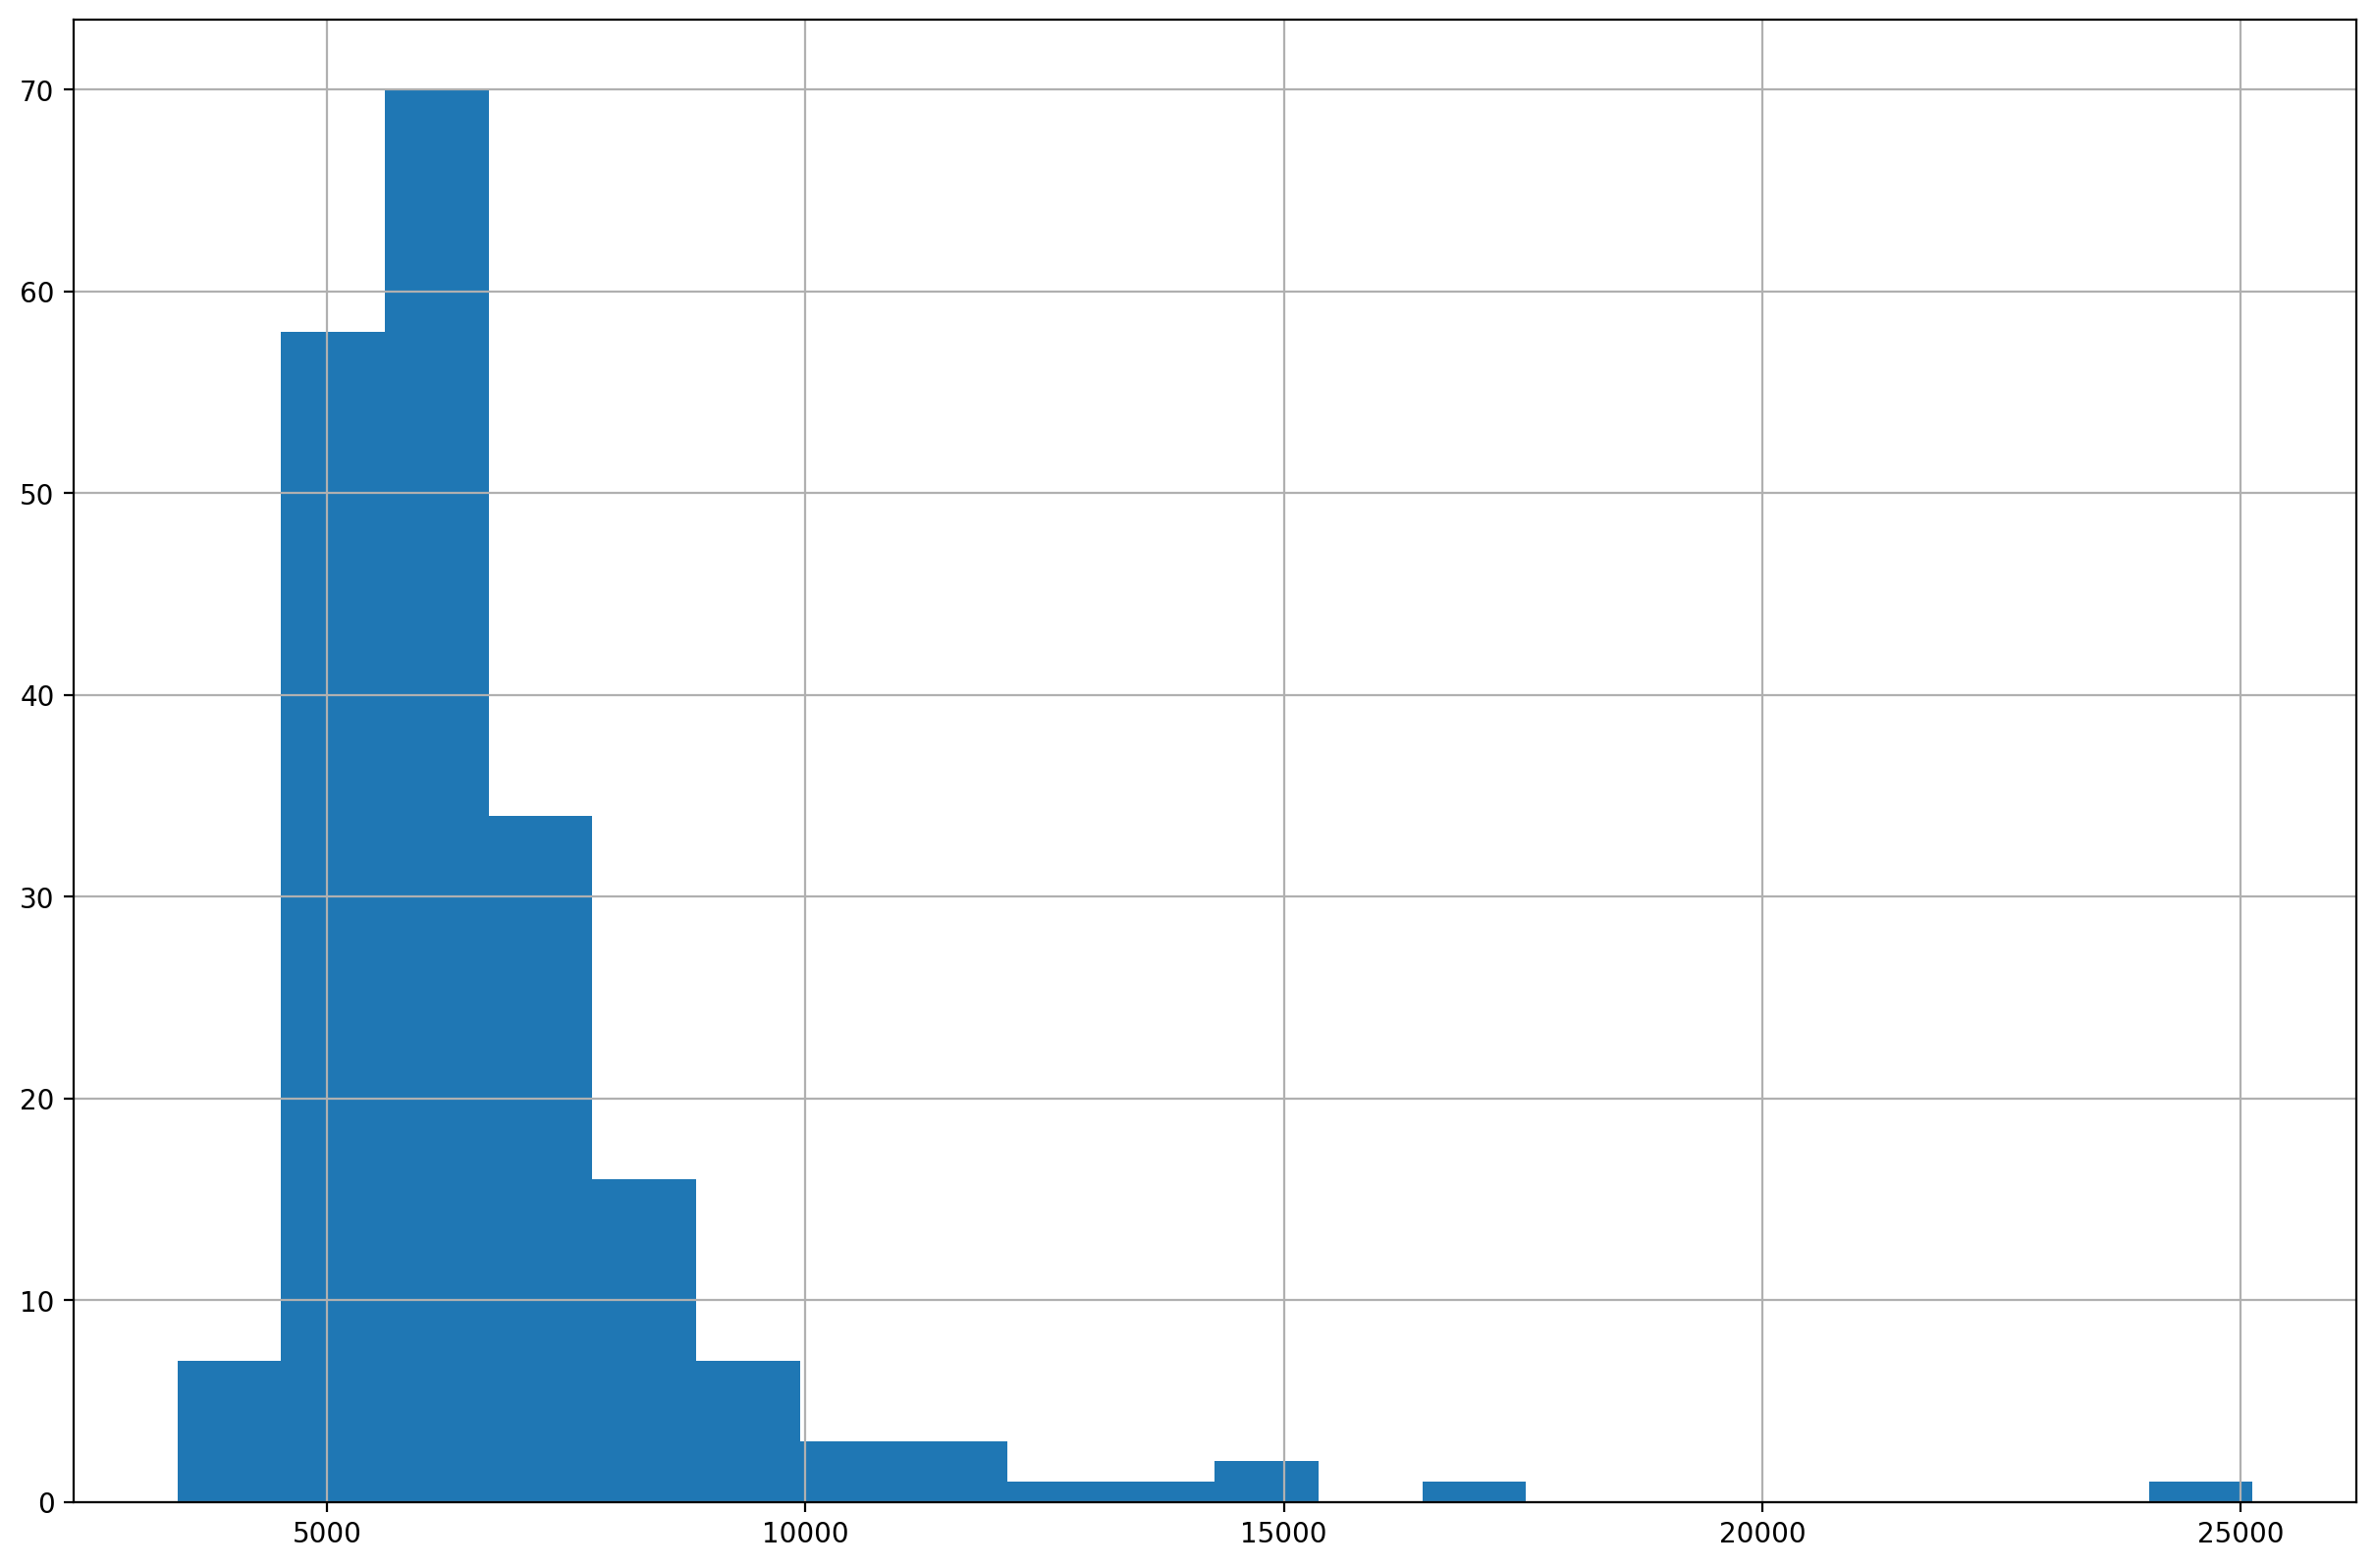

In [76]:
figure=plt.figure(figsize=(15,10),dpi=200)
new_df['fixed_area1'].hist(bins=20)
# new_df['fixed_area2'].hist(bins=20)

In [55]:
new_df['fixed_area1'].describe(),new_df['fixed_area2'].describe()

(count      204.000000
 mean      6649.750000
 std       2306.722755
 min       3433.500000
 25%       5401.312500
 50%       6115.500000
 75%       7242.500000
 max      25125.500000
 Name: fixed_area1, dtype: float64, count      204.000000
 mean      6922.044730
 std       2986.225284
 min          0.500000
 25%       5412.250000
 50%       6258.000000
 75%       7398.125000
 max      22135.000000
 Name: fixed_area2, dtype: float64)

In [53]:
new_df.to_csv(r'C:\Users\higuchi\Desktop\LAB\201906_\segmentation\0701max_slice2.csv')